#2 Hypothesis 1: those living in areas with high job density are more likely to be unemployed (Dujardin et al., 2008). We will assume a significance level of 5%

H0: Those living in areas with high job density are more likely to be unemployed than those who aren't
H1: Those living in areas with high job denisty are not more likely to be unemployed than their counterparts

What is high density, how is it defined? 

The author concludes that a zone showing high density is "a zone of very high job densities in the centre of the EUA, where some neighbourhoods have more than five jobs per labour force participant". The same author then concludes that "Indeed, the correlation between unemployment rate and total job density is significant and positive (0.35 for all jobs and 0.31 for lowskilled jobs)". This seems somewhat doubtful, since a value of 0.31 is only indicative of a weak correlation, so we will proceed with caution in mind.

For the area of Brussels "high density" areas seem to be 2 times the typical value per neighbourhood (or mean value). Hence. we will be using that as an indicator.

How do we define more likely to be unemployed than the counterpart, and how do we test the hypothesis?

We define likeliness of being unemployed by the probability of a borough having a higher unemployment value than the sample mean, which is an observation denoted by 0 or 1.

First off, the sample will be split in 2 groups, one containing job density values lower than or equal to 2*mean, and one containing the rest
Then, we will calculate the probability of being unemployed for each group, and compare the probabilities. This will let us know if people living in high job density areas are more or less likely to be unemployed, compared to those that don't live in such areas.


In [64]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from scipy import stats
import plotly.express as px
import plotly
import numpy as np
import seaborn as sns
from scipy.stats import norm

import matplotlib.pyplot as plt

In [43]:
PROC_DATA_PATH = '~/library/data/processed/'

In [44]:
df = pd.read_csv(PROC_DATA_PATH + 'youth_data_labelled.csv', sep=',', index_col=0)

In [45]:
df

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,1,1
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5,0,0
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2,1,1
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2,1,1
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5,1,1
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,0,0
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,1,1
7,Ealing,2011,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9,13.8,7.4,6.8,0,0
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,1,1
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,1,1


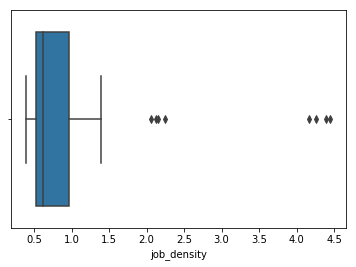

In [83]:
#check for outliers
sns.boxplot(x=df['job_density'])

In [85]:
z = np.abs(stats.zscore(df['job_density']))
print(z)

[0.57792995 0.34229653 0.46704363 0.46704363 0.35615732 1.65365715
 0.42546126 0.32843574 0.45318284 0.55020837 0.32843574 0.22599584
 0.6333731  0.53634758 0.43932205 0.33688216 0.02349837 0.58637636
 0.46162926 0.18982784 0.28685337 0.66109468 0.34229653 0.6333731
 0.61951231 0.14824547 0.4061861  0.34229653 0.62795873 0.64723389
 0.43932205 4.56442293 0.56406916 0.30071416 0.46704363 0.41160047
 0.34229653 1.73682189 0.39773968 0.31457495 0.41160047 0.56406916
 0.34229653 0.30916058 0.59179074 0.508626   0.42546126 0.39232531
 0.04580558 0.60023715 0.57251558 0.18982784 0.28685337 0.64723389
 0.30071416 0.59179074 0.55020837 0.17596705 0.53093321 0.32843574
 0.60023715 0.60565152 0.38387889 4.70303082 0.59179074 0.28685337
 0.45318284 0.41160047 0.31457495 1.77840425 0.46704363 0.30071416
 0.41160047 0.53634758 0.3700181  0.25371742 0.56406916 0.508626
 0.3700181  0.37846452 0.10124874 0.68340189 0.55865479 0.20368863
 0.20368863 0.6333731  0.245271   0.56406916 0.57792995 0.1482454

In [218]:
threshold = z.std()*2
print(np.where(z > threshold))

(array([  5,  31,  37,  63,  69,  95, 101, 127]),)


In [219]:
df_0 = df[(z < threshold)]

Text(0.5, 1.0, 'Youth unemployment rate vs job density per borough in 2014')

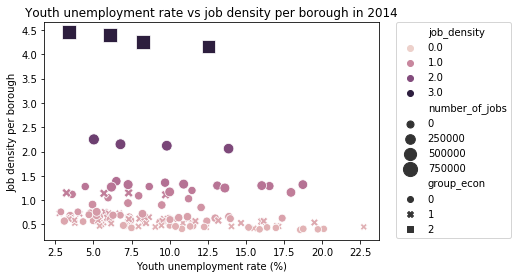

In [220]:
cmap = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
#map with outliers
fig2 = sns.scatterplot(data=df, y='job_density', x='youth_unemployment_rate', 
                hue="job_density", style='group_econ', size="number_of_jobs", sizes=(50, 200), legend='brief',
               hue_norm=(0,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Youth unemployment rate (%)")
plt.ylabel("Job density per borough")
plt.title("Youth unemployment rate vs job density per borough in 2014")

Text(0.5, 1.0, 'Youth unemployment rate vs job density per borough in 2014')

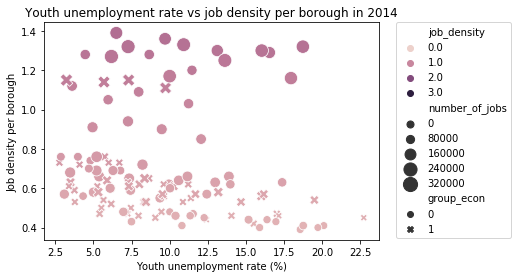

In [221]:
#map without outliers
fig = sns.scatterplot(data=df_0, y='job_density', x='youth_unemployment_rate', 
                hue="job_density", style='group_econ', size="number_of_jobs", sizes=(50, 200), legend='brief',
               hue_norm=(0,3))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Youth unemployment rate (%)")
plt.ylabel("Job density per borough")
plt.title("Youth unemployment rate vs job density per borough in 2014")


df_0

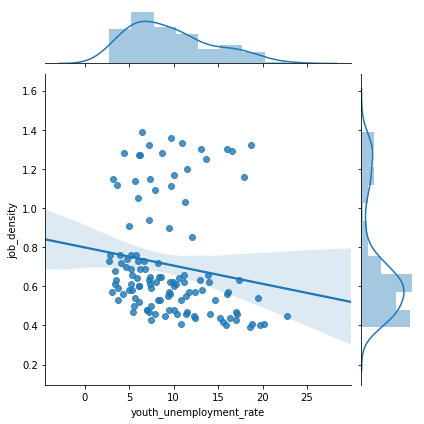

In [137]:
s = sns.jointplot(y='job_density', x='youth_unemployment_rate', data=df_0, kind="reg")

In [123]:
np.corrcoef(df_0['youth_unemployment_rate'].rank(), df_0['job_density'].rank())

array([[ 1.       , -0.3189742],
       [-0.3189742,  1.       ]])

In [124]:
np.corrcoef(df['youth_unemployment_rate'].rank(), df['job_density'].rank())

array([[ 1.        , -0.31027225],
       [-0.31027225,  1.        ]])

In [196]:
gra = df[df['job_density'] <= 2*df['job_density'].mean()]
grb = df[~(df['job_density'] <= 2*df['job_density'].mean())]

In [197]:
youmean = df['youth_unemployment_rate'].mean()

In [198]:
A = gra['youth_unemployment_rate'] > youmean

In [199]:
B = grb['youth_unemployment_rate'] > youmean

In [200]:
P_b = B.value_counts()[1]/B.count()

In [201]:
P_a = A.value_counts()[1]/A.count()

In [204]:
if P_a > P_b:
    print("We reject H0")
else:
    print("We accept H0")

We reject H0
